In [1]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import en_core_web_sm

nltk.download('punkt')
nltk.download('stopwords') # download the stop words for preprocessing data
nlp = en_core_web_sm.load()

[nltk_data] Downloading package punkt to /Users/urd_one/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/urd_one/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


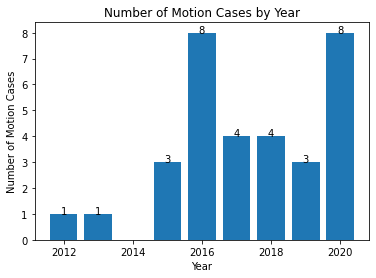

In [2]:
year = [2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020]
case_num = [1, 1, 3, 8, 4, 4, 3, 8]
plt.bar(year, case_num)
plt.xlabel('Year')
plt.ylabel('Number of Motion Cases')
plt.title('Number of Motion Cases by Year')
for i in range(len(case_num)):
    plt.text(year[i], case_num[i], case_num[i], fontsize=10, horizontalalignment='center')
plt.show()

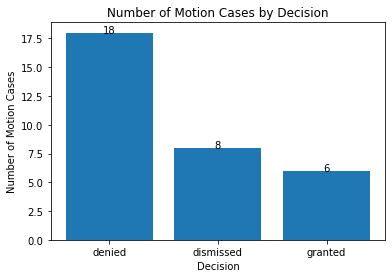

In [3]:
decision = ['denied', 'dismissed', 'granted']
decision_num = [18, 8, 6]
plt.bar(decision, decision_num)
plt.xlabel('Decision')
plt.ylabel('Number of Motion Cases')
plt.title('Number of Motion Cases by Decision')
for i in range(len(decision_num)):
    plt.text(decision[i], decision_num[i], decision_num[i], fontsize=10, horizontalalignment='center')
plt.show()

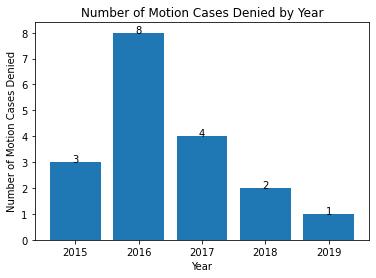

In [4]:
denied_year = ['2015', '2016', '2017', '2018', '2019']
denied_num = [3, 8, 4, 2, 1]
plt.bar(denied_year, denied_num)
plt.xlabel('Year')
plt.ylabel('Number of Motion Cases Denied')
plt.title('Number of Motion Cases Denied by Year')
for i in range(len(denied_year)):
    plt.text(denied_year[i], denied_num[i], denied_num[i], fontsize=10, horizontalalignment='center')
plt.show()

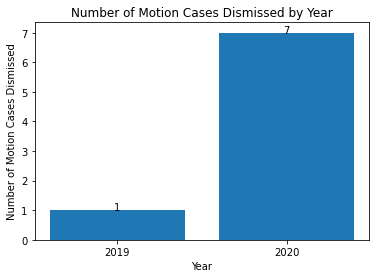

In [5]:
dismiss_year = ['2019', '2020']
dismiss_num = [1, 7]
plt.bar(dismiss_year, dismiss_num)
plt.xlabel('Year')
plt.ylabel('Number of Motion Cases Dismissed')
plt.title('Number of Motion Cases Dismissed by Year')
for i in range(len(dismiss_year)):
    plt.text(dismiss_year[i], dismiss_num[i], dismiss_num[i], fontsize=10, horizontalalignment='center')
plt.show()

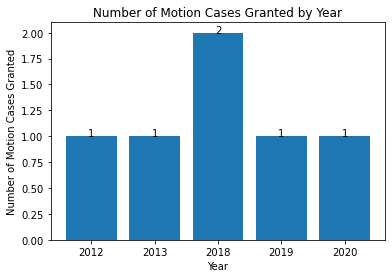

In [14]:
granted_year = ['2012', '2013', '2018', '2019', '2020']
granted_num = [1, 1, 2, 1, 1]
plt.bar(granted_year, granted_num)
plt.xlabel('Year')
plt.ylabel('Number of Motion Cases Granted')
plt.title('Number of Motion Cases Granted by Year')
for i in range(len(granted_year)):
    plt.text(granted_year[i], granted_num[i], granted_num[i], fontsize=10, horizontalalignment='center')
plt.show()

In [ ]:
# analysis of top words below

In [6]:
# read the dataset
df = pd.read_csv('motions_data.csv')

df = df.fillna("")

# only analyze motion cases
motion = df[df['order'].str.contains("motion")]

denied = motion[motion['order'].str.contains('denied')]
print('Number of denied motion cases:', len(denied))

dismissed = motion[motion['order'].str.contains('dismissed')]
print('Number of dismissed motion cases:', len(dismissed))

granted = motion[motion['order'].str.contains('granted')]
print('Number of granted motion cases:', len(granted))

Number of denied motion cases: 18
Number of dismissed motion cases: 8
Number of granted motion cases: 6


In [7]:
# excluded tags
excluded_tags = {"NOUN"}

for token in nlp("This is a sentence me here name"):
#         print(token.pos_)
        if token.pos_ in excluded_tags:
            print(token.pos_)
            print(token.text)

NOUN
sentence


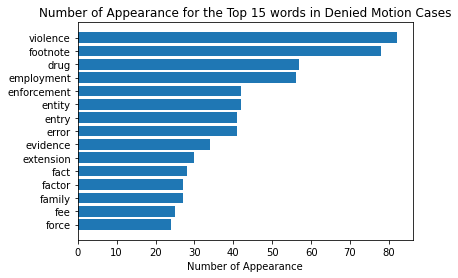

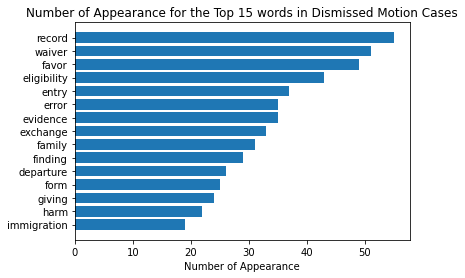

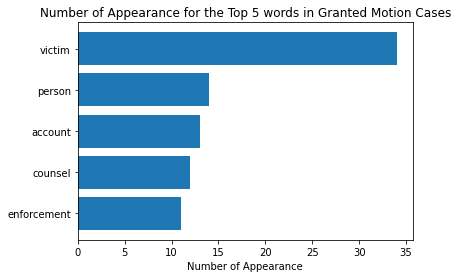

In [11]:
included_tags = {"NOUN"}
common_words = [
    'removal', 'year', 'applicant', 'director', 'act', 'law', 'document',
    'documentation', 'motion', 'appeal', 'decision', 'application', 'case',
    'detail', 'time', 'direction'
]

for order_type in [denied, dismissed, granted]:
    text = order_type['contents'].astype(str).str.lower().str.replace('[^\w\s]','').str.replace('\d+', '')
    desc = ''
    for each in text:
        desc += each
    
    tmp = nlp(desc)
    
    desc = ''
    for token in tmp:
        if token.pos_ in included_tags:
            desc += ' ' + token.text
    
    text_tokens = word_tokenize(desc)
    
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

    tokens_lemmatized = [WordNetLemmatizer().lemmatize(word) for word in tokens_without_sw]
    
    tokens_without_commonword = [word for word in tokens_lemmatized if not word in common_words]
    
    tokens_lemmatized = tokens_without_commonword
    
    stopwords_list = stopwords.words('english')

    vect = CountVectorizer(max_df=0.6, min_df=5, stop_words=stopwords_list)

    vected = vect.fit_transform(tokens_lemmatized)
    feature_array = np.array(vect.get_feature_names())
    tfidf_sorting = np.argsort(vected.toarray()).flatten()[::-1]
    
    if order_type is granted:
        n = 5
    else:
        n = 15
    top_words = list(feature_array[tfidf_sorting][:n][::-1])
    top_freqs = list(np.sort(vected.toarray().sum(axis=0))[::-1][:n][::-1])

    plt.barh(top_words, top_freqs)
    plt.xlabel('Number of Appearance')
    if order_type is denied:
        plt.title('Number of Appearance for the Top {} words in {} Motion Cases'.format(n, 'Denied'))
    elif order_type is dismissed:
        plt.title('Number of Appearance for the Top {} words in {} Motion Cases'.format(n, 'Dismissed'))
    else:
        plt.title('Number of Appearance for the Top {} words in {} Motion Cases'.format(n, 'Granted'))
    plt.show()

In [ ]:
# analysis of keywords provided by BU Law team below.

In [ ]:
df = df.rename(columns = {'Unnamed: 0' : 'dataset_num'})

In [ ]:
keywords_list = ["victim of a severe form of trafficking in persons","physically present","complied with reasonable requests for assistance", "extreme hardship", "inadmissible", "inadmissibility"]

In [ ]:
df['dataset_num'][df['order'].str.contains("granted")]

In [155]:
granted_handled = df.loc[[0,1,19,20,22,31],'description']

In [156]:
granted_description = granted_handled.values

In [157]:
granted_handled_contents = df.loc[[0,1,19,20,22,31],'contents']

In [158]:
granted_contents = granted_handled_contents.values

In [159]:
for i in range(len(granted_description)):
    granted_description[i] = granted_description[i].lower()
    granted_description[i] = granted_description[i].replace('.','')

In [160]:
granted_ocurrences_keywords = [0,0,0,0,0,0]
for i in granted_description:
    for j in range(len(keywords_list)):
        count = 0
        count = i.count(keywords_list[j])
        granted_ocurrences_keywords[j] += count

In [161]:
granted_ocurrences_keywords

[5, 2, 1, 0, 0, 0]

In [162]:
for i in granted_contents:
    for j in range(len(keywords_list)):
        count = 0
        count = i.count(keywords_list[j])
        granted_ocurrences_keywords[j] += count

In [163]:
granted_ocurrences_keywords

[12, 11, 1, 0, 0, 0]

In [164]:
granted_totals = zip(keywords_list,granted_ocurrences_keywords)
list(granted_totals)

[('victim of a severe form of trafficking in persons', 12),
 ('physically present', 11),
 ('complied with reasonable requests for assistance', 1),
 ('extreme hardship', 0),
 ('inadmissible', 0),
 ('inadmissibility', 0)]

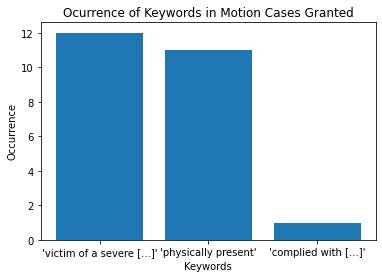

In [180]:
plt.bar(["'victim of a severe [...]'","'physically present'","'complied with [...]'"], [12, 11, 1])
plt.xlabel('Keywords')
plt.ylabel('Occurrence')
plt.title('Ocurrence of Keywords in Motion Cases Granted')
plt.show()

In [81]:
df['dataset_num'][df['order'].str.contains("denied")]

2     998
3     363
4     361
5      82
6     362
7     229
8     138
9     366
10    213
11    115
12    211
13    451
14    259
15    139
16     26
17    281
18    999
21    364
Name: dataset_num, dtype: int64

In [116]:
denied_handled = df.loc[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],'description']

In [118]:
denied_description = denied_handled.values

In [122]:
denied_handled_contents = df.loc[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],'contents']

In [124]:
denied_contents = denied_handled_contents.values

In [123]:
for i in range(len(denied_description)):
    denied_description[i] = denied_description[i].lower()
    denied_description[i] = denied_description[i].replace('.','')

In [125]:
denied_ocurrences_keywords = [0,0,0,0,0,0]
for i in denied_description:
    for j in range(len(keywords_list)):
        count = 0
        count = i.count(keywords_list[j])
        denied_ocurrences_keywords[j] += count

In [126]:
denied_ocurrences_keywords

[9, 6, 0, 2, 0, 0]

In [127]:
for i in denied_contents:
    for j in range(len(keywords_list)):
        count = 0
        count = i.count(keywords_list[j])
        denied_ocurrences_keywords[j] += count

In [128]:
denied_ocurrences_keywords

[20, 18, 0, 8, 0, 0]

In [129]:
denied_totals = zip(keywords_list,denied_ocurrences_keywords)
list(denied_totals)

[('victim of a severe form of trafficking in persons', 20),
 ('physically present', 18),
 ('complied with reasonable requests for assistance', 0),
 ('extreme hardship', 8),
 ('inadmissible', 0),
 ('inadmissibility', 0)]

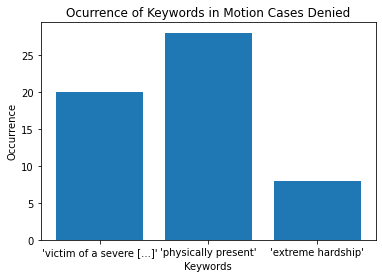

In [181]:
plt.bar(["'victim of a severe [...]'","'physically present'","'extreme hardship'"], [20, 28, 8])
plt.xlabel('Keywords')
plt.ylabel('Occurrence')
plt.title('Ocurrence of Keywords in Motion Cases Denied')
plt.show()

In [130]:
df['dataset_num'][df['order'].str.contains("dismissed")]

23    323
24     80
25     81
26    313
27    359
28    351
29    353
30    370
Name: dataset_num, dtype: int64

In [132]:
dismissed_handled = df.loc[[23,24,25,26,27,28,29,30],'description']

In [140]:
dismissed_description = dismissed_handled.values

In [141]:
dismissed_handled_contents = df.loc[[23,24,25,26,27,28,29,30],'contents']

In [143]:
dismissed_contents = dismissed_handled_contents.values

In [144]:
for i in range(len(dismissed_description)):
    dismissed_description[i] = dismissed_description[i].lower()
    dismissed_description[i] = dismissed_description[i].replace('.','')

In [146]:
dismissed_ocurrences_keywords = [0,0,0,0,0,0]
for i in dismissed_description:
    for j in range(len(keywords_list)):
        count = 0
        count = i.count(keywords_list[j])
        dismissed_ocurrences_keywords[j] += count

In [150]:
dismissed_ocurrences_keywords

[1, 1, 0, 0, 0, 2]

In [151]:
for i in dismissed_contents:
    for j in range(len(keywords_list)):
        count = 0
        count = i.count(keywords_list[j])
        dismissed_ocurrences_keywords[j] += count

In [152]:
dismissed_ocurrences_keywords

[3, 8, 0, 4, 7, 11]

In [153]:
dismissed_totals = zip(keywords_list,dismissed_ocurrences_keywords)
list(dismissed_totals)

[('victim of a severe form of trafficking in persons', 3),
 ('physically present', 8),
 ('complied with reasonable requests for assistance', 0),
 ('extreme hardship', 4),
 ('inadmissible', 7),
 ('inadmissibility', 11)]

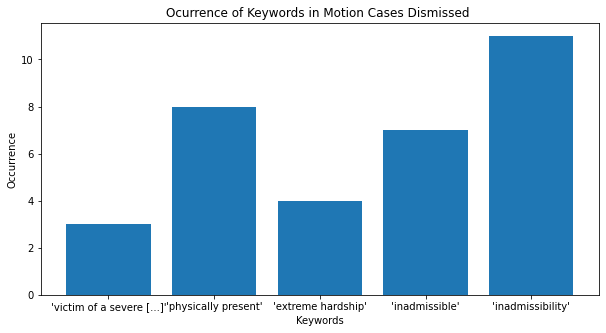

In [182]:
plt.figure(figsize=(10,5))
plt.bar(["'victim of a severe [...]'","'physically present'","'extreme hardship'","'inadmissible'","'inadmissibility'"], [3, 8, 4, 7, 11])
plt.xlabel('Keywords')
plt.ylabel('Occurrence')
plt.title('Ocurrence of Keywords in Motion Cases Dismissed ')
plt.show()

In [9]:
counsel = df.counsel.values

In [10]:
counsel.sort()
counsel

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes'], dtype=object)

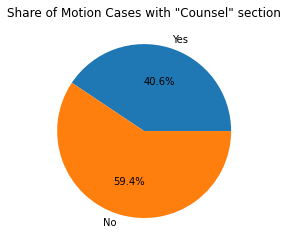

In [11]:
plt.pie([13,19],labels=["Yes","No"],autopct='%1.1f%%')
#plt.xlabel('Keywords')
#plt.ylabel('Occurrence')
plt.title('Share of Motion Cases with "Counsel" section')
plt.show()